In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
from pathlib import Path

In [2]:
df = pd.read_csv("sample_1pml_1570512675146.csv")

In [3]:
dr_nums = df['DriverNumber'].unique()
dr_nums, len(dr_nums)

(array([  167007,    40634,   115905,     9044,   112742,   140155,
          166749,   181610,  5131166,    38427,    42242, 20221758,
          431122,   310746,   166991,   363407,   380055,   174279,
         2354466,  5090117,    48493, 10161648,  4002190,  6000392,
         2330449, 16029017,  5131159,   393777,  2413017,   100366,
          138238,     3265,   110015,   131563,   131341,     5787,
          390401,   100925,   101501, 20445358,     4851,     8954],
       dtype=int64), 42)

In [4]:
dr=df[df["DriverNumber"]==5131159]

In [5]:
dr.head(10)

,CanDispatch,CarImage,CompanyID,Direction,DisplayName,DriverNumber,Latitude,Longitude,RadioNumber,SpeedFrom,SpeedTo,StatusTime,VehicleStatus
153,False,yellow,3,180,普通車,5131159,35.675394,139.771846,5518,60,69.0,2018-02-22 16:53:40,実車
630,True,yellow,3,270,普通車,5131159,35.670039,140.045907,5479,60,69.0,2017-07-01 23:13:46,空車
865,True,yellow,3,45,普通車,5131159,35.743665,139.807895,5494,60,69.0,2017-03-30 00:27:36,空車
879,False,black,3,135,黒タク,5131159,35.828961,139.737064,5480,60,69.0,2017-03-04 03:08:01,実車
1051,False,black,3,360,黒タク,5131159,35.704197,139.814424,5480,60,69.0,2017-09-04 00:20:23,実車
1171,False,black,3,360,黒タク,5131159,35.759858,139.802867,5496,60,69.0,2017-02-26 23:25:50,実車
1173,False,black,3,45,黒タク,5131159,35.731389,139.829700,5481,60,69.0,2017-02-23 21:25:48,実車
1180,False,yellow,3,360,普通車,5131159,35.749303,139.769648,5522,60,69.0,2016-07-14 01:02:11,実車
1347,False,black,3,90,黒タク,5131159,35.697449,139.842089,5480,60,69.0,2016-09-16 21:00:56,実車
1389,False,yellow,3,270,普通車,5131159,35.690008,139.992216,5503,60,69.0,2016-05-19 18:26:47,休憩


In [6]:
dr_sort = dr.sort_values(by=['StatusTime'])
dr_sort["VehicleStatus"].unique()

array(['空車', '休憩', '実車', '迎車'], dtype=object)

In [7]:
a = ((dr_sort["VehicleStatus"]== "実車").values).astype(np.int)
dif1_pick = a[1:]-a[:-1]
dif1_pick = np.append(dif1_pick, 0)
dif2_pick = np.append(a[2:]-a[:-2], [0,0])
dif_pick = dif1_pick+dif2_pick
#pick up する位置
dr_sort["pick"]=(dif_pick == 2).astype(np.int)
#dr_sort
#np.count_nonzero(alist == 1), np.count_nonzero(alist == -1),np.count_nonzero(alist == 0)

In [66]:
np.unique(pick_up(dr_sort)), np.unique(take(dr_sort))

(array([-2, -1,  0,  1,  2]), array([-2, -1,  0,  1,  2]))

In [4]:
def pick_up(df):
    a = ((df["VehicleStatus"]== "実車").values).astype(np.int)
    dif1_pick = a[1:]-a[:-1]
    dif1_pick = np.append(dif1_pick, 0)
    dif2_pick = np.append(a[2:]-a[:-2], [0,0])
    dif_pick = dif1_pick+dif2_pick
    
    
    dif2_take = np.append(a[2:]-a[:-2], 0)
    dif2_take = np.append(0,dif2_take)
    dif_take = dif1_pick + dif2_take
    return dif_pick, dif_take

In [32]:
def take(df):
    a = ((df["VehicleStatus"]== "実車").values).astype(np.int)
    print("a", len(a))
    dif2_take = np.append(a[2:]-a[:-2], 0)
    dif2_take = np.append(0,dif2_take)
    print
    dif_take = dif1_pick + dif2_take
    return dif_take

In [9]:
dif2_take = np.append(a[2:]-a[:-2], 0)
dif2_take = np.append(0,dif2_take)
dif_take = dif1_pick+dif2_take
#get out する位置
#dr_sort[dif_take == -2]
dr_sort["pick"]=dr_sort["pick"]-(dif_take == -2).astype(np.int)
dr_sort

,CanDispatch,CarImage,CompanyID,Direction,DisplayName,DriverNumber,Latitude,Longitude,RadioNumber,SpeedFrom,SpeedTo,StatusTime,VehicleStatus,pick
4309490,True,black,3,135,黒タク,5131159,35.746416,139.832615,5480,0,9.0,2016-04-01 08:12:31,空車,0
4312890,False,black,3,135,黒タク,5131159,35.746416,139.832615,5480,0,9.0,2016-04-01 08:12:35,休憩,0
1189873,False,black,3,270,黒タク,5131159,35.746165,139.829199,5480,10,19.0,2016-04-01 08:14:23,休憩,0
7532227,False,black,3,270,黒タク,5131159,35.747138,139.824922,5480,40,49.0,2016-04-01 08:15:03,休憩,0
7010441,False,black,3,225,黒タク,5131159,35.746582,139.821616,5480,30,39.0,2016-04-01 08:15:31,休憩,0
7808424,False,black,3,225,黒タク,5131159,35.745360,139.818117,5480,40,49.0,2016-04-01 08:15:58,休憩,0
7266885,False,black,3,225,黒タク,5131159,35.744249,139.814950,5480,30,39.0,2016-04-01 08:16:50,休憩,0
8827860,False,black,3,135,黒タク,5131159,35.741555,139.814812,5480,50,59.0,2016-04-01 08:18:54,休憩,0
5920387,False,black,3,135,黒タク,5131159,35.739333,139.816839,5480,30,39.0,2016-04-01 08:19:45,休憩,0
7040534,False,black,3,180,黒タク,5131159,35.736722,139.818006,5480,40,49.0,2016-04-01 08:20:10,休憩,0


In [5]:
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km

def dist(lat1, lon1, lat2, lon2):
    R = 6373.0
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c*1000
    #print("Result:", distance)
    return distance

In [44]:
df_dist = pd.DataFrame(columns=["dr_num",'start_time', 'finish_time', 'lat1', 'lon1',"lat2", "lon2", "dis"])
df_dist

,dr_num,start_time,finish_time,lat1,lon1,lat2,lon2,dis


In [6]:
def sum_dis(start, finish, df1):
    sum_= 0
    for i in range (start, finish):
        #print(i)
        sum_+= dist(df1.iloc[i,6],df1.iloc[i,7], 
                 df1.iloc[i+1,6],df1.iloc[i+1,7])
    return sum_

i=0
x=0
n=len(dr_sort)
while i<n:
    if dr_sort.iloc[i,13]==1:
        s = i
    elif dr_sort.iloc[i,13]==-1:
        f = i
        d = sum_dis(s,f)
        df_dist.loc[x] = [dr_sort.iloc[s, 5],dr_sort.iloc[s,11], dr_sort.iloc[f,11], 
                         dr_sort.iloc[s,6],dr_sort.iloc[s,7], 
                         dr_sort.iloc[f,6],dr_sort.iloc[f,7], d ]
        x+=1
    i+=1

def make_df(df):
    b = df
    return b

b = make_df
b

In [7]:
df_dists = pd.DataFrame(columns=["dr_num",'start_time', 'finish_time', 'lat1', 'lon1',"lat2", "lon2", "dis"])
#print(df_dist)
dr_nums = df['DriverNumber'].unique()
#dr_nums = [40634,   115905]
#dr_nums = [115905, 5131159]
    
for num in dr_nums:
    print(num)
    df_dist = pd.DataFrame(columns=["dr_num",'start_time', 'finish_time', 'lat1', 'lon1',"lat2", "lon2", "dis"])
    dr=df[df["DriverNumber"]==num]
    dr_sort = dr.sort_values(by=['StatusTime'])
    pick1, take1 = pick_up(dr_sort)
    dr_sort["pick"]= ((pick1 == 2).astype(np.int)-(take1 == -2).astype(np.int))
    i=0
    x=0
    n=len(dr_sort)
    s = 0
    while i<n:
        if dr_sort.iloc[i,13]==1:
            s = i
        elif dr_sort.iloc[i,13]==-1:
            f = i
            d = sum_dis(s,f, dr_sort)
            df_dist.loc[x] = [dr_sort.iloc[s, 5],dr_sort.iloc[s,11], dr_sort.iloc[f,11], 
                              dr_sort.iloc[s,6],dr_sort.iloc[s,7], 
                              dr_sort.iloc[f,6],dr_sort.iloc[f,7], d ]
            x+=1
        i+=1
        
    df_dists = pd.concat([df_dists,df_dist],ignore_index=True)

167007
40634
2016-04-01 00:00:28 2016-04-01 00:06:15
2016-04-01 00:20:15 2016-04-01 00:34:18
2016-04-01 01:09:23 2016-04-01 01:51:12
2016-04-01 02:18:03 2016-04-01 02:50:42
2016-04-01 03:14:37 2016-04-01 03:23:57
2016-04-01 03:26:53 2016-04-01 03:45:32
2016-04-01 04:10:02 2016-04-01 04:36:52
2016-04-01 04:39:47 2016-04-01 04:45:37
2016-04-04 10:11:56 2016-04-04 10:25:31
2016-04-04 10:47:40 2016-04-04 10:51:12
2016-04-04 10:58:11 2016-04-04 10:59:56
2016-04-04 11:15:06 2016-04-04 11:26:10
2016-04-04 11:53:35 2016-04-04 12:02:20
2016-04-04 12:08:45 2016-04-04 12:20:25
2016-04-04 13:03:00 2016-04-04 13:25:10
2016-04-04 13:31:00 2016-04-04 13:41:31
2016-04-04 16:45:52 2016-04-04 16:55:11
2016-04-04 17:01:01 2016-04-04 17:10:57
2016-04-04 17:23:46 2016-04-04 17:30:11
2016-04-04 17:48:56 2016-04-04 18:04:01
2016-04-04 18:21:33 2016-04-04 18:29:05
2016-04-04 19:06:25 2016-04-04 19:32:40
2016-04-04 19:35:04 2016-04-04 19:43:10
2016-04-04 20:00:06 2016-04-04 20:04:12
2016-04-04 20:05:57 2016-04

2016-04-22 18:56:25 2016-04-22 19:07:02
2016-04-22 19:24:20 2016-04-22 19:32:38
2016-04-22 19:56:33 2016-04-22 20:00:01
2016-04-22 20:32:33 2016-04-22 20:46:36
2016-04-22 22:04:14 2016-04-22 22:31:46
2016-04-22 23:08:20 2016-04-22 23:55:32
2016-04-23 01:08:02 2016-04-23 01:34:50
2016-04-23 02:05:09 2016-04-23 02:11:25
2016-04-23 02:13:58 2016-04-23 02:32:39
2016-04-23 02:59:14 2016-04-23 03:20:54
2016-04-23 03:47:38 2016-04-23 04:13:54
2016-04-24 10:25:10 2016-04-24 10:35:40
2016-04-24 10:52:00 2016-04-24 11:01:20
2016-04-24 11:10:40 2016-04-24 11:21:09
2016-04-24 11:34:00 2016-04-24 11:39:15
2016-04-24 12:04:19 2016-04-24 12:07:14
2016-04-24 12:07:49 2016-04-24 12:14:14
2016-04-24 12:42:15 2016-04-24 12:59:44
2016-04-24 13:31:15 2016-04-24 13:36:29
2016-04-24 15:57:04 2016-04-24 16:10:00
2016-04-24 16:21:34 2016-04-24 17:18:22
2016-04-24 19:48:51 2016-04-24 19:56:26
2016-04-24 20:13:56 2016-04-24 20:19:46
2016-04-24 20:44:17 2016-04-24 20:50:41
2016-04-24 22:11:46 2016-04-24 22:19:56


2016-05-20 18:38:41 2016-05-20 18:55:43
2016-05-20 18:58:08 2016-05-20 19:11:22
2016-05-20 20:39:57 2016-05-20 20:48:08
2016-05-20 20:57:27 2016-05-20 21:05:03
2016-05-20 21:16:27 2016-05-20 23:22:55
2016-05-21 00:10:03 2016-05-21 00:17:15
2016-05-21 00:34:33 2016-05-21 01:00:56
2016-05-21 01:48:25 2016-05-21 02:30:50
2016-05-21 02:32:33 2016-05-21 02:49:21
2016-05-21 03:28:01 2016-05-21 03:43:40
2016-05-21 03:52:03 2016-05-21 04:33:52
2016-05-23 10:10:51 2016-05-23 10:25:50
2016-05-23 10:29:21 2016-05-23 10:33:51
2016-05-23 10:36:51 2016-05-23 10:55:47
2016-05-23 11:14:06 2016-05-23 11:27:25
2016-05-23 12:03:12 2016-05-23 12:09:55
2016-05-23 12:31:15 2016-05-23 12:48:04
2016-05-23 13:02:01 2016-05-23 13:17:57
2016-05-23 13:22:10 2016-05-23 13:25:52
2016-05-23 13:33:01 2016-05-23 13:39:22
2016-05-23 13:42:42 2016-05-23 13:53:19
2016-05-23 16:49:52 2016-05-23 16:53:19
2016-05-23 17:03:10 2016-05-23 17:12:16
2016-05-23 17:15:28 2016-05-23 17:30:18
2016-05-23 17:36:52 2016-05-23 17:55:47


2016-06-09 04:11:29 2016-06-09 04:24:30
2016-06-10 10:54:21 2016-06-10 10:59:55
2016-06-10 11:00:10 2016-06-10 11:04:23
2016-06-10 11:22:23 2016-06-10 11:27:23
2016-06-10 11:32:47 2016-06-10 11:39:10
2016-06-10 11:48:05 2016-06-10 12:05:22
2016-06-10 12:26:06 2016-06-10 12:34:22
2016-06-10 12:44:53 2016-06-10 12:47:53
2016-06-10 12:55:48 2016-06-10 13:10:51
2016-06-10 13:12:51 2016-06-10 13:18:22
2016-06-10 13:42:34 2016-06-10 13:54:30
2016-06-10 14:01:43 2016-06-10 14:06:50
2016-06-10 17:18:39 2016-06-10 17:30:52
2016-06-10 17:41:16 2016-06-10 17:57:16
2016-06-10 18:33:18 2016-06-10 18:54:45
2016-06-10 18:57:20 2016-06-10 19:07:32
2016-06-10 19:19:27 2016-06-10 19:28:21
2016-06-10 19:48:57 2016-06-10 19:58:00
2016-06-10 20:09:48 2016-06-10 20:19:19
2016-06-10 20:31:14 2016-06-10 20:44:14
2016-06-10 22:18:24 2016-06-10 22:37:19
2016-06-10 23:28:39 2016-06-10 23:46:27
2016-06-11 00:34:49 2016-06-11 01:02:36
2016-06-11 01:40:39 2016-06-11 02:01:09
2016-06-11 02:23:34 2016-06-11 02:30:10


2016-06-26 18:44:13 2016-06-26 18:59:17
2016-06-26 19:30:13 2016-06-26 19:59:53
2016-06-26 20:22:52 2016-06-26 20:39:13
2016-06-26 20:48:43 2016-06-26 20:56:35
2016-06-26 22:03:02 2016-06-26 22:08:41
2016-06-26 22:22:27 2016-06-26 22:44:53
2016-06-26 22:57:13 2016-06-26 23:29:36
2016-06-27 00:05:46 2016-06-27 00:28:52
2016-06-27 00:38:13 2016-06-27 01:37:03
2016-06-27 03:12:57 2016-06-27 03:30:22
2016-06-27 03:36:23 2016-06-27 03:43:44
2016-06-28 10:36:26 2016-06-28 10:55:20
2016-06-28 10:59:15 2016-06-28 11:10:47
2016-06-28 11:29:18 2016-06-28 11:36:16
2016-06-28 11:39:32 2016-06-28 11:48:02
2016-06-28 11:50:15 2016-06-28 11:54:26
2016-06-28 11:56:56 2016-06-28 12:04:19
2016-06-28 12:14:00 2016-06-28 12:24:23
2016-06-28 12:37:26 2016-06-28 12:46:09
2016-06-28 12:58:19 2016-06-28 13:14:48
2016-06-28 13:18:35 2016-06-28 13:25:42
2016-06-28 13:27:53 2016-06-28 13:37:08
2016-06-28 15:48:33 2016-06-28 16:07:54
2016-06-28 16:19:29 2016-06-28 16:55:45
2016-06-28 17:21:58 2016-06-28 17:33:59


2016-08-03 19:02:05 2016-08-03 19:15:09
2016-08-03 19:27:06 2016-08-03 19:36:09
2016-08-03 20:05:39 2016-08-03 20:14:33
2016-08-03 20:15:55 2016-08-03 20:46:11
2016-08-03 21:00:40 2016-08-03 21:14:44
2016-08-03 22:22:39 2016-08-03 22:51:43
2016-08-04 01:34:02 2016-08-04 01:49:14
2016-08-04 02:28:39 2016-08-04 02:44:41
2016-08-04 03:18:09 2016-08-04 04:04:57
2016-08-05 10:55:50 2016-08-05 11:04:35
2016-08-05 11:19:16 2016-08-05 11:30:12
2016-08-05 11:36:16 2016-08-05 11:55:01
2016-08-05 11:56:41 2016-08-05 12:02:53
2016-08-05 12:23:32 2016-08-05 12:33:16
2016-08-05 12:37:53 2016-08-05 12:54:55
2016-08-05 12:58:19 2016-08-05 13:00:50
2016-08-05 13:03:16 2016-08-05 13:07:03
2016-08-05 13:08:37 2016-08-05 13:13:59
2016-08-05 13:21:56 2016-08-05 13:28:46
2016-08-05 13:38:16 2016-08-05 13:43:51
2016-08-05 13:44:35 2016-08-05 13:51:24
2016-08-05 13:52:01 2016-08-05 13:59:03
2016-08-05 14:04:21 2016-08-05 14:19:35
2016-08-05 16:32:52 2016-08-05 16:39:17
2016-08-05 16:40:55 2016-08-05 16:47:22


2016-09-02 21:55:03 2016-09-02 22:19:17
2016-09-02 22:40:23 2016-09-02 22:49:23
2016-09-02 23:07:23 2016-09-02 23:19:40
2016-09-03 00:31:53 2016-09-03 01:37:27
2016-09-03 01:53:40 2016-09-03 03:03:41
2016-09-03 03:08:49 2016-09-03 04:06:09
2016-09-03 04:09:53 2016-09-03 04:30:58
2016-09-04 10:34:28 2016-09-04 10:49:16
2016-09-04 10:54:49 2016-09-04 11:05:56
2016-09-04 11:08:34 2016-09-04 11:25:37
2016-09-04 11:35:48 2016-09-04 11:47:47
2016-09-04 12:03:10 2016-09-04 12:07:17
2016-09-04 12:38:15 2016-09-04 12:42:46
2016-09-04 12:45:01 2016-09-04 13:05:44
2016-09-04 13:22:07 2016-09-04 13:27:48
2016-09-04 13:37:49 2016-09-04 13:49:53
2016-09-04 13:55:22 2016-09-04 15:49:21
2016-09-04 16:11:21 2016-09-04 16:19:48
2016-09-04 16:27:58 2016-09-04 16:38:43
2016-09-04 16:42:13 2016-09-04 16:57:24
2016-09-04 17:02:58 2016-09-04 17:17:59
2016-09-04 17:20:55 2016-09-04 17:44:20
2016-09-04 17:59:30 2016-09-04 18:05:21
2016-09-04 18:08:52 2016-09-04 18:15:57
2016-09-04 18:34:31 2016-09-04 18:49:43


2016-09-22 00:06:00 2016-09-22 01:06:23
2016-09-22 04:26:50 2016-09-22 04:36:18
2016-09-23 10:39:01 2016-09-23 11:00:55
2016-09-23 11:01:47 2016-09-23 11:10:56
2016-09-23 11:16:56 2016-09-23 12:07:52
2016-09-23 12:52:43 2016-09-23 13:22:22
2016-09-23 13:33:52 2016-09-23 13:50:52
2016-09-23 13:51:52 2016-09-23 13:57:15
2016-09-23 15:35:22 2016-09-23 16:12:52
2016-09-23 16:33:52 2016-09-23 16:44:32
2016-09-23 16:48:22 2016-09-23 17:26:14
2016-09-23 17:30:22 2016-09-23 17:43:35
2016-09-23 18:08:22 2016-09-23 18:56:22
2016-09-23 19:46:16 2016-09-23 19:47:20
2016-09-23 19:56:31 2016-09-23 20:14:36
2016-09-23 20:49:14 2016-09-23 20:54:25
2016-09-23 22:19:31 2016-09-23 22:25:31
2016-09-24 00:10:38 2016-09-24 00:26:43
2016-09-24 01:31:05 2016-09-24 02:20:53
2016-09-24 03:19:45 2016-09-24 03:34:01
2016-09-24 04:11:31 2016-09-24 04:31:34
2016-09-25 10:39:48 2016-09-25 10:47:44
2016-09-25 11:09:19 2016-09-25 11:21:48
2016-09-25 11:33:50 2016-09-25 11:56:49
2016-09-25 11:59:57 2016-09-25 12:42:13


2016-10-14 18:49:34 2016-10-14 19:34:20
2016-10-14 19:36:50 2016-10-14 19:48:13
2016-10-14 19:51:05 2016-10-14 20:22:35
2016-10-14 20:35:32 2016-10-14 20:42:51
2016-10-14 20:47:12 2016-10-14 20:54:00
2016-10-14 21:14:42 2016-10-14 21:49:42
2016-10-14 23:02:53 2016-10-14 23:27:43
2016-10-14 23:49:06 2016-10-15 00:23:46
2016-10-15 00:54:43 2016-10-15 01:28:16
2016-10-15 02:16:11 2016-10-15 03:11:39
2016-10-16 10:43:00 2016-10-16 10:49:55
2016-10-16 11:10:39 2016-10-16 11:19:35
2016-10-16 11:22:30 2016-10-16 11:43:47
2016-10-16 11:59:30 2016-10-16 12:22:11
2016-10-16 12:25:18 2016-10-16 12:45:46
2016-10-16 13:01:29 2016-10-16 14:03:22
2016-10-16 15:55:59 2016-10-16 16:45:14
2016-10-16 17:15:16 2016-10-16 17:43:45
2016-10-16 18:00:09 2016-10-16 18:20:29
2016-10-16 18:51:06 2016-10-16 19:05:11
2016-10-16 19:07:06 2016-10-16 19:12:09
2016-10-16 19:45:20 2016-10-16 19:52:50
2016-10-16 20:25:25 2016-10-16 20:36:55
2016-10-16 20:48:08 2016-10-16 20:53:35
2016-10-16 21:00:48 2016-10-16 21:07:18


2016-11-04 10:18:15 2016-11-04 10:33:01
2016-11-04 11:02:43 2016-11-04 11:10:31
2016-11-04 11:26:39 2016-11-04 11:36:13
2016-11-04 11:46:44 2016-11-04 11:56:45
2016-11-04 12:08:13 2016-11-04 13:07:17
2016-11-04 13:27:42 2016-11-04 13:43:49
2016-11-04 13:59:00 2016-11-04 14:38:42
2016-11-04 16:42:49 2016-11-04 16:54:47
2016-11-04 17:51:19 2016-11-04 18:19:07
2016-11-04 18:29:43 2016-11-04 18:47:21
2016-11-04 18:50:13 2016-11-04 18:59:21
2016-11-04 19:03:43 2016-11-04 19:10:07
2016-11-04 20:00:52 2016-11-04 20:06:13
2016-11-04 20:07:43 2016-11-04 20:17:07
2016-11-04 22:46:13 2016-11-04 23:38:17
2016-11-05 01:23:55 2016-11-05 01:34:13
2016-11-05 01:39:15 2016-11-05 02:06:32
2016-11-05 02:31:43 2016-11-05 02:50:13
2016-11-05 02:52:06 2016-11-05 03:00:46
2016-11-05 03:08:43 2016-11-05 03:28:32
2016-11-05 03:36:54 2016-11-05 04:55:50
2016-11-07 10:57:09 2016-11-07 11:00:28
2016-11-07 11:17:09 2016-11-07 11:27:42
2016-11-07 11:35:48 2016-11-07 11:42:09
2016-11-07 11:53:39 2016-11-07 12:04:35


2016-11-23 17:20:18 2016-11-23 17:25:56
2016-11-23 17:32:43 2016-11-23 17:51:42
2016-11-23 18:04:20 2016-11-23 18:09:19
2016-11-23 18:32:13 2016-11-23 18:41:00
2016-11-23 18:46:49 2016-11-23 18:53:13
2016-11-23 19:29:43 2016-11-23 19:37:56
2016-11-23 19:42:52 2016-11-23 19:48:38
2016-11-23 21:34:13 2016-11-23 21:49:49
2016-11-23 22:05:25 2016-11-23 23:08:38
2016-11-23 23:59:20 2016-11-24 00:59:13
2016-11-24 02:11:43 2016-11-24 02:48:49
2016-11-25 10:13:35 2016-11-25 10:35:09
2016-11-25 10:38:32 2016-11-25 11:01:00
2016-11-25 11:08:05 2016-11-25 11:27:20
2016-11-25 11:46:35 2016-11-25 11:57:35
2016-11-25 11:58:24 2016-11-25 12:12:54
2016-11-25 12:19:23 2016-11-25 12:24:43
2016-11-25 12:35:27 2016-11-25 12:42:19
2016-11-25 12:53:48 2016-11-25 13:19:25
2016-11-25 13:34:05 2016-11-25 13:47:23
2016-11-25 16:18:19 2016-11-25 16:27:43
2016-11-25 16:30:39 2016-11-25 16:48:19
2016-11-25 16:56:33 2016-11-25 17:28:41
2016-11-25 17:31:55 2016-11-25 17:34:20
2016-11-25 17:37:22 2016-11-25 17:49:57


2016-12-13 03:03:24 2016-12-13 03:14:12
2016-12-13 05:21:24 2016-12-13 05:43:54
2016-12-14 10:41:01 2016-12-14 11:02:35
2016-12-14 11:12:11 2016-12-14 11:28:29
2016-12-14 11:43:23 2016-12-14 12:01:46
2016-12-14 12:06:51 2016-12-14 12:13:26
2016-12-14 12:16:17 2016-12-14 12:24:25
2016-12-14 12:28:11 2016-12-14 12:52:52
2016-12-14 13:03:35 2016-12-14 13:12:42
2016-12-14 13:16:29 2016-12-14 13:33:40
2016-12-14 13:34:20 2016-12-14 13:44:55
2016-12-14 15:35:21 2016-12-14 15:50:35
2016-12-14 15:51:27 2016-12-14 15:57:54
2016-12-14 16:09:38 2016-12-14 16:28:26
2016-12-14 17:15:41 2016-12-14 17:21:43
2016-12-14 17:23:54 2016-12-14 17:34:59
2016-12-14 17:36:13 2016-12-14 17:50:23
2016-12-14 17:53:46 2016-12-14 17:59:20
2016-12-14 18:02:10 2016-12-14 18:09:58
2016-12-14 18:12:03 2016-12-14 18:21:23
2016-12-14 18:39:05 2016-12-14 18:48:03
2016-12-14 18:50:52 2016-12-14 18:58:47
2016-12-14 19:39:42 2016-12-14 19:57:56
2016-12-14 20:05:04 2016-12-14 20:10:13
2016-12-14 20:46:11 2016-12-14 21:26:27


2016-12-30 19:27:02 2016-12-30 19:35:18
2016-12-30 19:59:10 2016-12-30 20:03:21
2016-12-30 20:07:21 2016-12-30 20:17:15
2016-12-30 21:23:21 2016-12-30 21:33:49
2016-12-30 22:38:51 2016-12-30 22:49:15
2016-12-31 00:26:21 2016-12-31 00:31:17
2016-12-31 00:35:30 2016-12-31 00:47:06
2016-12-31 01:04:59 2016-12-31 01:28:44
2016-12-31 02:00:41 2016-12-31 02:23:37
2016-12-31 02:25:21 2016-12-31 02:28:21
2016-12-31 02:57:08 2016-12-31 03:06:14
2016-12-31 03:58:03 2016-12-31 04:21:20
2017-01-05 10:37:59 2017-01-05 11:11:24
2017-01-05 11:14:22 2017-01-05 11:19:16
2017-01-05 11:35:05 2017-01-05 11:43:06
2017-01-05 11:44:05 2017-01-05 11:55:49
2017-01-05 12:09:58 2017-01-05 12:23:43
2017-01-05 12:36:21 2017-01-05 12:39:51
2017-01-05 12:42:18 2017-01-05 12:50:03
2017-01-05 13:08:57 2017-01-05 13:19:25
2017-01-05 13:38:05 2017-01-05 14:03:12
2017-01-05 14:03:57 2017-01-05 14:10:15
2017-01-05 14:43:05 2017-01-05 14:55:40
2017-01-05 16:43:35 2017-01-05 16:46:05
2017-01-05 16:52:35 2017-01-05 16:59:19


2017-01-27 11:19:18 2017-01-27 11:46:05
2017-01-27 12:03:18 2017-01-27 12:12:18
2017-01-27 12:16:46 2017-01-27 12:21:48
2017-01-27 12:28:27 2017-01-27 12:40:48
2017-01-27 13:02:48 2017-01-27 13:08:02
2017-01-27 13:17:49 2017-01-27 13:21:21
2017-01-27 13:30:15 2017-01-27 13:37:08
2017-01-27 13:41:18 2017-01-27 13:48:48
2017-01-27 15:46:17 2017-01-27 16:10:22
2017-01-27 16:51:52 2017-01-27 17:12:27
2017-01-27 17:25:08 2017-01-27 17:35:11
2017-01-27 17:53:51 2017-01-27 18:04:51
2017-01-27 18:21:18 2017-01-27 18:30:14
2017-01-27 18:35:17 2017-01-27 18:42:38
2017-01-27 18:45:07 2017-01-27 19:00:53
2017-01-27 19:23:18 2017-01-27 20:00:22
2017-01-27 20:44:46 2017-01-27 20:56:21
2017-01-27 22:24:50 2017-01-27 22:37:14
2017-01-27 22:56:18 2017-01-27 23:32:23
2017-01-28 00:45:26 2017-01-28 01:18:20
2017-01-28 02:20:18 2017-01-28 02:57:29
2017-01-28 03:40:23 2017-01-28 03:53:18
2017-01-30 10:41:15 2017-01-30 10:47:21
2017-01-30 11:26:53 2017-01-30 11:35:23
2017-01-30 11:53:10 2017-01-30 12:02:25


2017-02-15 11:22:35 2017-02-15 11:25:26
2017-02-15 11:32:55 2017-02-15 11:43:15
2017-02-15 11:47:05 2017-02-15 11:56:07
2017-02-15 12:00:59 2017-02-15 12:17:33
2017-02-15 12:21:41 2017-02-15 12:34:45
2017-02-15 12:43:36 2017-02-15 12:52:59
2017-02-15 13:10:05 2017-02-15 13:17:17
2017-02-15 13:17:54 2017-02-15 13:22:43
2017-02-15 13:23:29 2017-02-15 13:28:35
2017-02-15 13:46:21 2017-02-15 14:01:08
2017-02-15 14:03:13 2017-02-15 14:07:26
2017-02-15 16:13:40 2017-02-15 16:24:22
2017-02-15 16:26:05 2017-02-15 16:36:40
2017-02-15 17:32:57 2017-02-15 18:00:46
2017-02-15 18:02:50 2017-02-15 18:10:10
2017-02-15 18:23:14 2017-02-15 18:33:41
2017-02-15 18:41:25 2017-02-15 18:55:05
2017-02-15 19:09:32 2017-02-15 19:14:49
2017-02-15 19:19:28 2017-02-15 19:23:22
2017-02-15 19:34:15 2017-02-15 20:12:05
2017-02-15 20:13:51 2017-02-15 20:26:34
2017-02-15 20:35:05 2017-02-15 20:40:52
2017-02-15 20:47:15 2017-02-15 20:53:41
2017-02-15 22:26:29 2017-02-15 22:47:25
2017-02-15 23:54:05 2017-02-16 00:21:46


2017-03-06 13:17:51 2017-03-06 13:22:11
2017-03-06 13:37:07 2017-03-06 13:41:02
2017-03-06 15:47:02 2017-03-06 15:57:39
2017-03-06 16:02:19 2017-03-06 16:08:09
2017-03-06 16:24:18 2017-03-06 16:33:21
2017-03-06 16:37:07 2017-03-06 16:40:07
2017-03-06 16:43:11 2017-03-06 16:48:53
2017-03-06 17:49:14 2017-03-06 18:02:15
2017-03-06 18:05:19 2017-03-06 18:13:13
2017-03-06 18:16:06 2017-03-06 18:23:32
2017-03-06 18:34:42 2017-03-06 18:47:41
2017-03-06 18:49:32 2017-03-06 19:00:27
2017-03-06 19:16:02 2017-03-06 19:26:32
2017-03-06 19:41:12 2017-03-06 19:51:21
2017-03-06 19:59:45 2017-03-06 20:02:46
2017-03-06 20:06:15 2017-03-06 20:17:11
2017-03-06 20:29:37 2017-03-06 20:34:02
2017-03-06 21:23:00 2017-03-06 21:31:32
2017-03-06 22:50:07 2017-03-06 23:00:30
2017-03-06 23:04:17 2017-03-06 23:11:45
2017-03-07 01:45:02 2017-03-07 01:51:54
2017-03-07 02:15:32 2017-03-07 02:35:22
2017-03-07 03:35:02 2017-03-07 03:42:42
2017-03-08 10:18:46 2017-03-08 10:23:50
2017-03-08 10:32:30 2017-03-08 10:58:43


2017-03-24 16:08:47 2017-03-24 16:25:30
2017-03-24 16:31:28 2017-03-24 17:05:28
2017-03-24 17:10:37 2017-03-24 17:25:41
2017-03-24 17:31:16 2017-03-24 17:38:04
2017-03-24 17:58:16 2017-03-24 18:06:49
2017-03-24 18:19:20 2017-03-24 18:32:04
2017-03-24 18:32:53 2017-03-24 18:38:57
2017-03-24 18:40:50 2017-03-24 18:57:22
2017-03-24 19:14:25 2017-03-24 19:19:49
2017-03-24 19:33:06 2017-03-24 19:35:58
2017-03-24 19:37:32 2017-03-24 19:45:20
2017-03-24 19:46:46 2017-03-24 20:14:17
2017-03-24 20:42:50 2017-03-24 20:58:12
2017-03-24 21:03:55 2017-03-24 21:09:24
2017-03-24 22:16:50 2017-03-24 22:26:20
2017-03-24 22:47:32 2017-03-24 23:05:03
2017-03-24 23:55:48 2017-03-25 00:32:56
2017-03-25 01:30:24 2017-03-25 01:54:50
2017-03-25 02:01:06 2017-03-25 02:13:30
2017-03-25 02:26:16 2017-03-25 02:36:03
2017-03-25 02:38:49 2017-03-25 02:45:50
2017-03-25 03:18:50 2017-03-25 03:38:49
2017-03-25 04:03:39 2017-03-25 04:12:23
2017-03-25 05:05:44 2017-03-25 05:18:02
2017-03-28 10:44:25 2017-03-28 11:07:07


2017-04-14 13:45:22 2017-04-14 13:53:09
2017-04-14 14:00:10 2017-04-14 14:06:41
2017-04-14 14:22:52 2017-04-14 14:38:55
2017-04-14 14:40:58 2017-04-14 14:54:12
2017-04-14 17:26:42 2017-04-14 17:35:04
2017-04-14 17:37:13 2017-04-14 17:48:13
2017-04-14 17:53:19 2017-04-14 18:23:07
2017-04-14 18:30:09 2017-04-14 18:54:11
2017-04-14 19:09:32 2017-04-14 19:14:25
2017-04-14 19:16:37 2017-04-14 19:24:18
2017-04-14 19:31:11 2017-04-14 19:41:37
2017-04-14 19:44:09 2017-04-14 19:51:59
2017-04-14 19:56:54 2017-04-14 20:01:16
2017-04-14 20:05:21 2017-04-14 20:14:42
2017-04-14 20:16:26 2017-04-14 21:05:14
2017-04-14 23:14:05 2017-04-15 00:12:49
2017-04-15 00:38:41 2017-04-15 00:49:43
2017-04-15 01:09:03 2017-04-15 01:25:03
2017-04-15 01:39:38 2017-04-15 02:42:49
2017-04-15 03:26:47 2017-04-15 03:58:25
2017-04-17 10:48:05 2017-04-17 10:54:47
2017-04-17 11:37:17 2017-04-17 11:43:06
2017-04-17 12:01:09 2017-04-17 12:11:57
2017-04-17 12:31:51 2017-04-17 12:36:37
2017-04-17 12:46:18 2017-04-17 12:54:48


2017-05-08 13:43:22 2017-05-08 13:48:52
2017-05-08 15:33:49 2017-05-08 15:41:36
2017-05-08 15:42:49 2017-05-08 15:46:58
2017-05-08 16:23:12 2017-05-08 16:29:13
2017-05-08 16:30:37 2017-05-08 16:37:56
2017-05-08 16:41:40 2017-05-08 16:44:18
2017-05-08 16:52:44 2017-05-08 17:04:44
2017-05-08 17:10:57 2017-05-08 17:19:20
2017-05-08 17:32:08 2017-05-08 17:47:57
2017-05-08 18:26:53 2017-05-08 18:37:00
2017-05-08 18:40:14 2017-05-08 18:55:14
2017-05-08 18:57:27 2017-05-08 19:07:00
2017-05-08 19:30:25 2017-05-08 19:34:48
2017-05-08 19:51:45 2017-05-08 20:05:02
2017-05-08 20:07:54 2017-05-08 20:26:32
2017-05-08 22:16:19 2017-05-08 22:31:44
2017-05-08 22:36:31 2017-05-08 22:56:04
2017-05-09 01:09:13 2017-05-09 01:18:03
2017-05-09 01:31:43 2017-05-09 02:02:12
2017-05-09 03:21:08 2017-05-09 03:36:46
2017-05-09 03:55:38 2017-05-09 04:10:30
2017-05-09 04:32:08 2017-05-09 04:45:00
2017-05-10 10:42:21 2017-05-10 10:46:21
2017-05-10 11:12:16 2017-05-10 11:17:41
2017-05-10 11:19:35 2017-05-10 11:26:54


2017-05-24 18:26:30 2017-05-24 18:55:53
2017-05-24 19:06:15 2017-05-24 19:19:21
2017-05-24 19:30:10 2017-05-24 19:49:54
2017-05-24 20:05:38 2017-05-24 20:10:13
2017-05-24 20:14:09 2017-05-24 20:17:56
2017-05-24 20:25:26 2017-05-24 20:31:54
2017-05-24 20:32:42 2017-05-24 20:46:04
2017-05-24 21:07:35 2017-05-24 21:14:37
2017-05-24 21:26:21 2017-05-24 22:16:38
2017-05-25 00:53:20 2017-05-25 01:21:19
2017-05-25 01:32:38 2017-05-25 02:17:34
2017-05-25 04:24:56 2017-05-25 04:31:11
115905
9044
112742
140155
166749
181610
5131166
38427
42242
20221758
431122
310746
166991
363407
380055
174279
2354466
5090117
48493
10161648
4002190
6000392
2330449
16029017
5131159
393777
2413017
100366
138238
3265
110015
131563
131341
5787
390401
100925
101501
20445358
4851
8954


### 最初の時点で、実車になっているタクシーがあるため
dr_num	start_time	finish_time	lat1	lon1	lat2	lon2	dis  
40634	2016-12-07 14:42:13	2016-04-01 00:06:15	35.690774	139.747322	35.711846	139.776528	0
### のようなものが最初に出てくる可能性あり

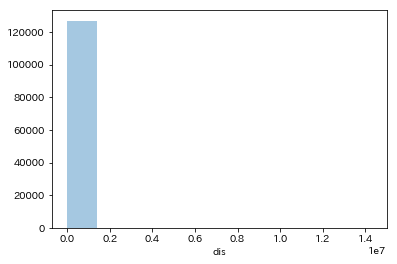

In [19]:
sns.distplot(df_dists["dis"], kde=False, rug=False, bins=10) 

In [23]:
df_dists['dis'].max()

14282779.26191702

In [16]:
np.mean(df_dists["dis"]), np.var(df_dists["dis"])

(4402.299424649535, 3260869155.119257)

In [8]:
df_dists 

,dr_num,start_time,finish_time,lat1,lon1,lat2,lon2,dis
0,167007,2016-04-01 08:23:23,2016-04-01 08:57:08,35.725998,139.822224,35.689216,139.745462,11955.232742
1,167007,2016-04-01 09:10:41,2016-04-01 09:21:07,35.691702,139.741012,35.701415,139.756430,2232.459013
2,167007,2016-04-01 09:22:57,2016-04-01 09:33:31,35.701405,139.755431,35.710814,139.773949,3438.608272
3,167007,2016-04-01 09:35:47,2016-04-01 09:40:54,35.712424,139.778178,35.707448,139.793827,1669.184583
4,167007,2016-04-01 09:55:37,2016-04-01 10:15:51,35.697036,139.786218,35.669411,139.741313,5657.205801
5,167007,2016-04-01 10:46:47,2016-04-01 10:59:00,35.655367,139.732265,35.627182,139.724257,3537.733629
6,167007,2016-04-01 11:17:43,2016-04-01 11:24:07,35.643190,139.710737,35.648269,139.701917,1084.756362
7,167007,2016-04-01 11:25:51,2016-04-01 11:32:15,35.648855,139.702057,35.657315,139.703937,1118.883959
8,167007,2016-04-01 11:42:10,2016-04-01 12:05:31,35.662545,139.717266,35.637861,139.752834,5638.141673
9,167007,2016-04-01 12:21:16,2016-04-01 12:35:15,35.653290,139.761352,35.651369,139.724075,4176.405629


In [10]:
df_dists.to_csv("dr_record.csv")

In [9]:
dr_406 = df[df["DriverNumber"]==8954].sort_values(by=['StatusTime'])
dr_406.tail(50)

,CanDispatch,CarImage,CompanyID,Direction,DisplayName,DriverNumber,Latitude,Longitude,RadioNumber,SpeedFrom,SpeedTo,StatusTime,VehicleStatus
6945885,False,black,8,222,黒タク,8954,35.769783,139.723233,2046,0,0.0,2018-03-31 23:14:02,離れ
6946064,False,black,8,222,黒タク,8954,35.769783,139.723233,2046,0,0.0,2018-03-31 23:17:02,離れ
7717950,False,black,8,222,黒タク,8954,35.769783,139.723233,2046,0,0.0,2018-03-31 23:20:02,離れ
8081017,False,black,8,222,黒タク,8954,35.769783,139.723233,2046,0,0.0,2018-03-31 23:23:02,離れ
8996792,False,black,8,222,黒タク,8954,35.769783,139.723233,2046,0,0.0,2018-03-31 23:26:04,離れ
7467883,False,black,8,314,黒タク,8954,35.770817,139.722400,2046,25,25.0,2018-03-31 23:28:29,離れ
9121825,False,black,8,338,黒タク,8954,35.771833,139.721467,2046,31,31.0,2018-03-31 23:28:48,離れ
6240896,False,black,8,352,黒タク,8954,35.772867,139.721133,2046,39,39.0,2018-03-31 23:29:00,離れ
7449650,False,black,8,0,黒タク,8954,35.773933,139.721100,2046,42,42.0,2018-03-31 23:29:10,離れ
6221741,False,black,8,340,黒タク,8954,35.775000,139.720867,2046,33,33.0,2018-03-31 23:29:21,離れ


In [47]:
df_dist

,dr_num,start_time,finish_time,lat1,lon1,lat2,lon2,dis
0,5131159,2016-04-01 08:30:18,2016-04-01 08:38:51,35.714946,139.808841,35.710613,139.791815,1839.863298
1,5131159,2016-04-01 08:44:45,2016-04-01 08:52:52,35.707030,139.804481,35.695476,139.815175,2020.321069
2,5131159,2016-04-01 08:58:03,2016-04-01 09:00:47,35.687644,139.815814,35.682922,139.814564,544.423173
3,5131159,2016-04-01 09:17:19,2016-04-01 09:28:28,35.689283,139.829896,35.708586,139.827562,2403.678324
4,5131159,2016-04-01 09:37:03,2016-04-01 09:42:10,35.708447,139.815896,35.697837,139.814536,1255.501997
5,5131159,2016-04-01 10:47:41,2016-04-01 10:59:02,35.696448,139.815147,35.669923,139.805927,3330.949243
6,5131159,2016-04-01 11:11:32,2016-04-01 11:34:18,35.680450,139.835063,35.720862,139.800092,6583.105544
7,5131159,2016-04-01 12:22:14,2016-04-01 12:31:30,35.696282,139.815147,35.678284,139.811565,2222.885592
8,5131159,2016-04-01 13:34:04,2016-04-01 13:45:04,35.696254,139.815147,35.666924,139.817120,3271.972501
9,5131159,2016-04-01 13:51:24,2016-04-01 13:58:37,35.675867,139.819703,35.693921,139.815119,2432.359999
